In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Housing prices.csv',header = None)
df.head()

,0,1,2
0,2104,3,400000.0
1,1600,3,330000.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,540000.0


In [3]:
df.rename(columns = {0:'size',1:'No.Rooms',2:'price'}, inplace = True)
df.head()

,size,No.Rooms,price
0,2104,3,400000.0
1,1600,3,330000.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,540000.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

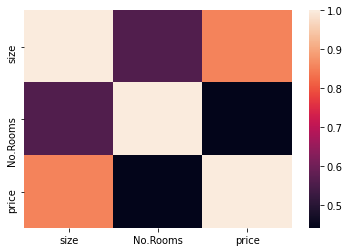

In [5]:
x = df[['size','No.Rooms']]
y = ['price']
dfcorr = df.corr()
sns.heatmap(dfcorr)

In [6]:
df['No.Rooms'].value_counts()

3    25
4    14
2     6
5     1
1     1
Name: No.Rooms, dtype: int64

<AxesSubplot:xlabel='No.Rooms', ylabel='price'>

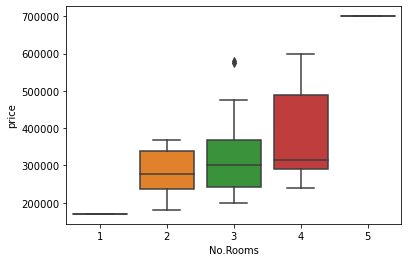

In [7]:
sns.boxplot(x = df['No.Rooms'],y = df['price'])

<AxesSubplot:xlabel='size', ylabel='price'>

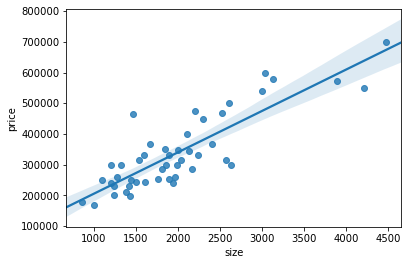

In [8]:
sns.regplot(x = df['size'], y = df['price'])

<AxesSubplot:ylabel='price'>

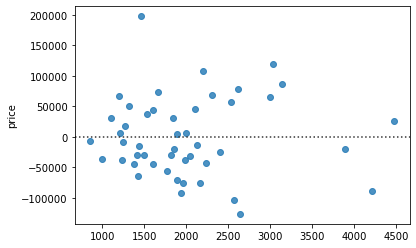

In [9]:
sns.residplot(df[['size']],df['price'])

Calculating the correlation coefficients for the variables

In [10]:
colnames = df.columns.values.tolist()
colnames[:-1]

['size', 'No.Rooms']

In [11]:
from scipy import stats

for columnname in colnames[:-1]:
    coeffsize,pvalsize = stats.pearsonr(df[columnname],df['price'])
    print('Correlation,Pvalue of {} with price = {},{}'.format(columnname,coeffsize,pvalsize))

Correlation,Pvalue of size with price = 0.8547810236737811,2.0884867575367565e-14
Correlation,Pvalue of No.Rooms with price = 0.4420854419722269,0.0018633412416802554


In [12]:
x = df[['size']]
y = df[['price']]
x_train1 = x.iloc[0:37,:]
x_test1 = x.iloc[37:47,:]
y_train1 = y.iloc[0:37,:]
y_test1 = y.iloc[37:47,:]
y_test1

,price
37,345000.0
38,549000.0
39,287000.0
40,369000.0
41,330000.0
42,314000.0
43,299000.0
44,180000.0
45,300000.0
46,240000.0


Trying Least Square method to get a model

Trying with only "Size" variable. This will be a basic linear model


First doing the preprocessing work of scaling the variable

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()
SCALE.fit(x_train1)
x_train1scaled = SCALE.transform(x_train1)
x_train1scaleddf = pd.DataFrame(x_train1scaled)
x_train1scaleddf.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


,0
0,0.139963
1,-0.529104
2,0.532907
3,-0.773366
4,1.329415


In [14]:
x_test1

,size
37,2132
38,4215
39,2162
40,1664
41,2238
42,2567
43,1200
44,852
45,1852
46,1203


Building the Linear model using Linear Regression

In [15]:
#making a linear regression object
lm1 = LinearRegression()
lm1.fit(x_train1scaleddf,y_train1)
print('Coefficients : {}'.format(lm1.coef_))
print('Intercept: {}'.format(lm1.intercept_))

Coefficients : [[113988.5878276]]
Intercept: [345702.7027027]


Using the Training samples to check the accuracy of the model.
First we have to scale the testing data too

In [16]:
SCALEtest = StandardScaler()
SCALEtest.fit(x_test1)
x_test1scaled = SCALEtest.transform(x_test1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
y_test1comparison = pd.DataFrame(y_test1.to_numpy())
y_test1comparison.rename(columns = {0:'Actual'}, inplace = True)
x_test1scaled

array([[ 0.13760314],
       [ 2.45847232],
       [ 0.17102901],
       [-0.38384034],
       [ 0.25570786],
       [ 0.62227817],
       [-0.90082704],
       [-1.28856707],
       [-0.17437159],
       [-0.89748446]])

In [18]:
y_test1hat = pd.DataFrame(lm1.predict(x_test1scaled))
y_test1hat.rename(columns = {0:'Predicted'}, inplace = True)

dfcomparison = pd.concat([y_test1hat,y_test1comparison],axis = 1)
dfcomparison

,Predicted,Actual
0,361387.890478,345000.0
1,625940.490764,549000.0
2,365198.057549,287000.0
3,301949.284172,369000.0
4,374850.480795,330000.0
5,416635.313005,314000.0
6,243018.700143,299000.0
7,198820.762122,180000.0
8,325826.331150,300000.0
9,243399.716850,240000.0


In [26]:
y_train1hat = pd.DataFrame(lm1.predict(x_train1scaled))
y_train1hat.rename(columns = {0:'Predicted_Train'}, inplace = True)
dfcomparisontrain = pd.concat([y_train1hat,y_train1],axis = 1)
dfcomparisontrain

,Predicted_Train,price
0,361656.882325,400000.0
1,285390.914217,330000.0
2,406448.006451,369000.0
3,257547.783003,232000.0
4,497240.825627,540000.0
5,343649.639855,300000.0
6,275403.704108,315000.0
7,259212.318021,199000.0
8,252100.213853,212000.0
9,269350.849496,243000.0


Calculating the MSE for a Single Variable Linear Regression with Least Square Method

In [19]:
from sklearn.metrics import r2_score
differencedf = dfcomparison['Actual'] - dfcomparison['Predicted']


In [20]:
mse = (np.square(differencedf).sum(axis = 0))/differencedf.shape[0]
r2value = r2_score(y_test1,y_test1hat)
print('MSE : {} \n r2 value : {}'.format(mse,r2value))

MSE : 3351139434.953221 
 r2 value : 0.5987433039912997


In [27]:
trainingr2value = r2_score(y_train1hat,y_train1)
trainingr2value

0.6876459538897586

Plotting out results for Single Variable Linear Regresion with Least Square Method

In [21]:
testvalues = pd.concat([x_test1,y_test1],axis = 1)
testvalues.sort_values(by = ['size'],inplace = True)
testvalues.reset_index(inplace = True, drop = True)
testvalues
xvaluestoplot = pd.DataFrame(np.linspace(testvalues['size'].min(),testvalues['size'].max(),10))
testvalues2 = pd.concat([testvalues,xvaluestoplot],axis = 1)
testvalues2.rename(columns = {0:'xval_predict'}, inplace = True)
testvalues2

SCALEtest = StandardScaler()
SCALEtest.fit(testvalues2[['xval_predict']])
xval_predictscaled = SCALEtest.transform(testvalues2[['xval_predict']])
xval_predictscaleddf = pd.DataFrame(xval_predictscaled)
testvalues3 = pd.concat([testvalues2,xval_predictscaleddf],axis = 1)
testvalues3.rename(columns = {0:'xval_predictscaled'}, inplace = True)
testvalues3
y_predicted = pd.DataFrame(lm1.predict(testvalues3[['xval_predictscaled']]))
testvaluesfinal = pd.concat([testvalues3,y_predicted],axis = 1)

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#x_test1
#y_test1
#sns.scatterplot(x = x_test1, y = y_test1,ax = ax1)

<AxesSubplot:xlabel='xval_predict', ylabel='y_predicted'>

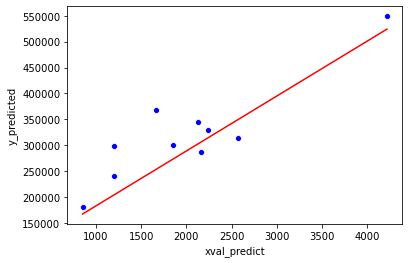

In [22]:
testvaluesfinal.rename(columns = {0:'y_predicted'},inplace = True)
figcomparison = plt.figure()
axcomparison  = figcomparison.add_subplot(111)
sns.scatterplot(x = testvaluesfinal['size'], y = testvaluesfinal['price'], color = 'b', ax = axcomparison)
sns.lineplot(x = testvaluesfinal['xval_predict'], y = testvaluesfinal['y_predicted'], color = 'r', ax = axcomparison)

Training the model using SGD regression

In [23]:
from sklearn.linear_model import SGDRegressor
gdreg = SGDRegressor(loss = 'squared_loss',max_iter = 1500, learning_rate = 'constant')

In [28]:
trainingdata = pd.concat([x_train1,y_train1],axis = 1)
trainingdata

,size,price
0,2104,400000.0
1,1600,330000.0
2,2400,369000.0
3,1416,232000.0
4,3000,540000.0
5,1985,300000.0
6,1534,315000.0
7,1427,199000.0
8,1380,212000.0
9,1494,243000.0


Scaling and training 

In [48]:
SCALEgd = StandardScaler()
x = trainingdata[['size']]
y = trainingdata[['price']]
SCALEgd.fit(x)
xgd_trainscaled = pd.DataFrame(SCALEgd.transform(x))
gdreg.fit(xgd_trainscaled,y)
ygd_trainpredicted = pd.DataFrame(gdreg.predict(xgd_trainscaled))
gdcomparisondf = pd.concat([ygd_trainpredicted,y_train1hat,y],axis = 1)
gdcomparisondf.rename(columns = {0:'ygd_predicted'}, inplace = True)
gdcomparisondf
print(gdreg.coef_)
print(gdreg.intercept_)

[113961.00523834]
[345430.29347375]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y wa

In [40]:
#predicting using testing data
ygdtest = gdreg.predict(x_test1scaled)
r2valuegdreg = r2_score(y_test1,ygdtest)
r2valuegdreg

0.6039568830810883

From the above analysis, we see that for both models LinearRegression (which uses Ordinary Least Square method) and SGDRegressor (which uses Least-Squares method), both results have similar r^2 values

Using both price and size to predict price

In [55]:
x = df[['size','No.Rooms']]
y = df[['price']]
x_train1mlr = x.iloc[0:37,:]
x_test1mlr = x.iloc[37:47,:]
y_train1mlr = y.iloc[0:37,:]
y_test1mlr = y.iloc[37:47,:]


In [56]:
 #scaling the data 
SCALEmlr = StandardScaler()
SCALEmlr.fit(x_train1mlr)
xtrain_scaledmlr = SCALEmlr.transform(x_train1mlr)
gdregmlr = SGDRegressor(loss = 'squared_loss',max_iter = 1500, learning_rate = 'constant')
gdregmlr.fit(xtrain_scaledmlr,y_train1mlr)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConve

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [61]:
print(gdregmlr.coef_,gdregmlr.intercept_)

[113988.34525555   -216.59165155] [345254.87959074]


In [72]:
xtrain_scaledmlr

array([[ 1.39962955e-01, -1.82331239e-01],
       [-5.29103743e-01, -1.82331239e-01],
       [ 5.32906889e-01, -1.82331239e-01],
       [-7.73366188e-01, -1.53158241e+00],
       [ 1.32941486e+00,  1.16691993e+00],
       [-1.80111263e-02,  1.16691993e+00],
       [-6.16719620e-01, -1.82331239e-01],
       [-7.58763542e-01, -1.82331239e-01],
       [-8.21156667e-01, -1.82331239e-01],
       [-6.69820152e-01, -1.82331239e-01],
       [-7.77492243e-02,  1.16691993e+00],
       [ 1.90157309e-03, -1.82331239e-01],
       [-1.44124889e-01, -1.82331239e-01],
       [ 3.29147951e+00,  2.51617110e+00],
       [-9.69838155e-01, -1.82331239e-01],
       [ 4.00155560e-01,  1.16691993e+00],
       [-9.00807464e-01, -1.53158241e+00],
       [-1.01231858e+00, -1.82331239e-01],
       [ 8.10357167e-01,  1.16691993e+00],
       [ 1.37056778e+00,  1.16691993e+00],
       [-3.07409024e-01, -1.82331239e-01],
       [-1.46779915e-01, -1.53158241e+00],
       [-5.23793690e-01, -1.82331239e-01],
       [-4.

In [58]:
ytrain_predictmlr = pd.DataFrame(gdregmlr.predict(xtrain_scaledmlr))
comparisondfmlr = pd.concat([ytrain_predictmlr,y_train1mlr],axis = 1)
comparisondfmlr

,0,price
0,361248.516686,400000.0
1,284982.710875,330000.0
2,406039.545495,369000.0
3,257431.875452,232000.0
4,496539.934921,540000.0
5,342949.075996,300000.0
6,274995.522019,315000.0
7,258804.170388,199000.0
8,251692.081355,212000.0
9,268942.680288,243000.0


In [59]:
#scaling the data
SCALEmlr = StandardScaler()
SCALEmlr.fit(x_test1mlr)
xtest_scaledmlr = SCALEmlr.transform(x_test1mlr)
ytest_predictmlr = gdregmlr.predict(xtest_scaledmlr)
r2valuemlr = r2_score(y_test1mlr,ytest_predictmlr)
r2valuemlr

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


0.6031589081125255

In [62]:
SCALEmlr.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [63]:
SCALEmlr.mean_

array([2008.5,    3.3])

In [64]:
SCALEmlr.var_

array([8.0552165e+05, 6.1000000e-01])

In [70]:
test2data = pd.DataFrame(np.array([[1650],[3]]).reshape(1,2))
test2data

,0,1
0,1650,3


In [74]:
SCALEmlr.transform(test2data)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.39943908, -0.38411064]])

In [76]:
print ('Price of house of 1650sqft and 3 rooms is : {}'.format(gdregmlr.predict(SCALEmlr.transform(test2data))))

Price of house of 1650sqft and 3 rooms is : [299806.67514472]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
